In [15]:
import glob
import numpy as np
import random
import librosa
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [16]:
class_names = os.listdir("../feature/feature_mfcc/")
class_names.sort()

print(class_names)

x_list = []
y_list = []

for i in range(0,len(class_names)):
    files=os.listdir("../feature/feature_mfcc/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]

    for j in range(0, len(files)):
        x = np.load("../feature/feature_mfcc/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)


['2017019740001_kwakjuheon', '2017019740002_kimjiho', '2017019740003_songyejin', '2017019740004_parksohui', '2017019740005_moonyeonwoo', '2017019740006_kangsubin', '2017019740007_leekyeongeun', '2017019740008_chochaeyeon', '2017019740009_shindonghwan', '2017019740010_kwakmirae', '2017019740011_kimhyeryeong', '2017019740012_chaeminjoon', '2017019740013_kwakyiheon', '2017019740014_leesumin', '2017019740015_choihayoung', '2017019740016_kangyeseo', '2017019740017_kwakmihyang', '2017019740018_eundano', '2017019740019_limjinju', '2017019740020_kimseongje', '2017019740021_kwakbokyeong', '2017019770001_kwonyuna', '2017019770002_kwoneunkyung', '2017019770003_johaesu', '2017019770004_leebyeongjin', '2017019770005_hyeonsanghyeok', '2017019770006_jennie', '2017019770007_simseungmin', '2017019770008_parksomi', '2017019770009_yuminji', '2017019770010_parksojin', '2017019770011_kwonyeonwoo', '2017019770012_ladakyeong', '2017019770013_janghyomin', '2017019770014_parkeunbi', '2017019770015_parkdayeung'

In [17]:
x_train = np.array(x_list)
y_train = np.array(y_list)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_train: (320, 469, 12)
y_train: (320,)


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [20]:
print("x_train:", x_train.shape)
print("y_train:", y_train_encoded.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val_encoded.shape)

x_train: (256, 469, 12)
y_train: (256, 64)
x_val: (64, 469, 12)
y_val: (64, 64)


In [21]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
n_features = x_train.shape[1]
max_length = x_train.shape[2]
input_shape = (n_features, max_length)
dropout = 0.25
n_classes = len(class_names)
n_epochs = 50
batch_size = 16

In [23]:
model = Sequential()

model.add(LSTM(256, return_sequences=True, input_shape=input_shape,dropout=dropout))
model.add(Dropout(dropout))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(dropout))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(dropout))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(n_classes, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 469, 256)          275456    
_________________________________________________________________
dropout_5 (Dropout)          (None, 469, 256)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 469, 128)          197120    
_________________________________________________________________
dropout_6 (Dropout)          (None, 469, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 469, 64)           49408     
_________________________________________________________________
dropout_7 (Dropout)          (None, 469, 64)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 469, 64)          

In [25]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"], optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False))

In [26]:
history = model.fit(x_train, y_train_encoded, 
                    batch_size=batch_size, epochs=n_epochs, verbose=2,
                    validation_data=(x_val, y_val_encoded))

Train on 256 samples, validate on 64 samples
Epoch 1/50
256/256 - 4s - loss: 4.1672 - accuracy: 0.0195 - val_loss: 4.1407 - val_accuracy: 0.0156
Epoch 2/50
256/256 - 1s - loss: 4.1457 - accuracy: 0.0352 - val_loss: 4.1248 - val_accuracy: 0.0312
Epoch 3/50
256/256 - 1s - loss: 4.1164 - accuracy: 0.0352 - val_loss: 4.1001 - val_accuracy: 0.0781
Epoch 4/50
256/256 - 1s - loss: 4.0921 - accuracy: 0.0625 - val_loss: 4.0733 - val_accuracy: 0.0938
Epoch 5/50
256/256 - 1s - loss: 4.0405 - accuracy: 0.0820 - val_loss: 4.0346 - val_accuracy: 0.1094
Epoch 6/50
256/256 - 1s - loss: 4.0076 - accuracy: 0.1094 - val_loss: 3.9854 - val_accuracy: 0.1875
Epoch 7/50
256/256 - 1s - loss: 3.9142 - accuracy: 0.1523 - val_loss: 3.9221 - val_accuracy: 0.2344
Epoch 8/50
256/256 - 1s - loss: 3.8484 - accuracy: 0.1953 - val_loss: 3.8396 - val_accuracy: 0.2656
Epoch 9/50
256/256 - 1s - loss: 3.7140 - accuracy: 0.2656 - val_loss: 3.7383 - val_accuracy: 0.2812
Epoch 10/50
256/256 - 1s - loss: 3.5747 - accuracy: 0.2

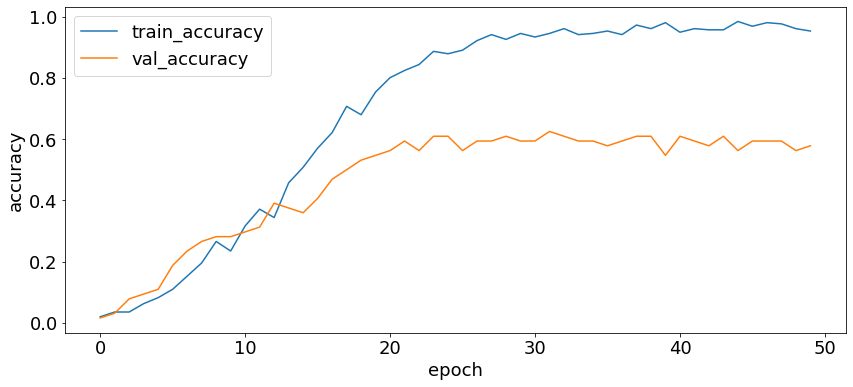

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [30]:
from sklearn.metrics import accuracy_score

x_validation_list=[]
y_validation_list=[]

val_file_path = "../feature/feature_mfcc_validation/"
val_class_names = os.listdir(val_file_path)
val_class_names.sort()
val_fname=[]
X_TF_pred = []
y_TF_pred = []

for i in range(0,len(val_class_names)):
    val_files=os.listdir(val_file_path+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]
    for j in range(0, len(val_files)):
        val_fname.append(val_file_path+val_class_names[i]+"/"+val_files[j])
        

for i,fname in zip(range(0,len(val_fname)), val_fname):
    #print(i,fname)
    tempX = np.load(val_fname[i])
    x_validation_list.append(tempX)
    y_validation_list.append(val_class_names.index(fname.split('/')[3]))
    
X_TF_pred = np.array(x_validation_list)
y_TF_real_pred = np.array(y_validation_list)

pred_out = model.predict(X_TF_pred)

real =[]
pred_out_idex=[]


for i,pred in zip(range(0, len(pred_out)), pred_out) :
   
    print("Predict :",class_names[np.argmax(pred)], ", Real :", val_class_names[y_TF_real_pred[i]])
    real.append(class_names.index(val_class_names[y_TF_real_pred[i]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print (accuracy_score(real, pred_out_idex))



Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019880004_myeongjaewon , Real : 2017019740001_kwakjuheon
Predict : 2017019770015_parkdayeung , Real : 2017019740001_kwakjuheon
Predict : 2017019770018_janggyeoul , Real : 2017019740001_kwakjuheon
Predict : 2017019740019_limjinju , Real : 2017019740001_kwakjuheon
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019770018_janggyeoul , Real : 2017019880001_kimsubin
0.

In [31]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model2 = Sequential()
model2.add(LSTM(
      256,
      input_shape=input_shape,
      return_sequences=True
))
model2.add(Dropout(dropout))
model2.add(LSTM(512, return_sequences=True))
model2.add(Dropout(dropout))
model2.add(LSTM(256))
model2.add(Dense(256))
model2.add(Dropout(dropout))
model2.add(Dense(n_classes))
model2.add(Activation('softmax'))

In [32]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"], optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False))

In [33]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 469, 256)          275456    
_________________________________________________________________
dropout_10 (Dropout)         (None, 469, 256)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 469, 512)          1574912   
_________________________________________________________________
dropout_11 (Dropout)         (None, 469, 512)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 256)               787456    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)              

In [34]:
history2 = model2.fit(x_train, y_train_encoded, 
                    batch_size=batch_size, epochs=n_epochs, verbose=2,
                    validation_data=(x_val, y_val_encoded))

Train on 256 samples, validate on 64 samples
Epoch 1/50
256/256 - 4s - loss: 4.1645 - accuracy: 0.0117 - val_loss: 4.1436 - val_accuracy: 0.0312
Epoch 2/50
256/256 - 2s - loss: 4.1194 - accuracy: 0.0391 - val_loss: 4.1275 - val_accuracy: 0.0312
Epoch 3/50
256/256 - 2s - loss: 4.0577 - accuracy: 0.0586 - val_loss: 4.1111 - val_accuracy: 0.0469
Epoch 4/50
256/256 - 2s - loss: 4.0155 - accuracy: 0.1523 - val_loss: 4.0966 - val_accuracy: 0.0469
Epoch 5/50
256/256 - 2s - loss: 3.9595 - accuracy: 0.2305 - val_loss: 4.0804 - val_accuracy: 0.0625
Epoch 6/50
256/256 - 2s - loss: 3.9197 - accuracy: 0.3008 - val_loss: 4.0632 - val_accuracy: 0.0625
Epoch 7/50
256/256 - 2s - loss: 3.8763 - accuracy: 0.3438 - val_loss: 4.0479 - val_accuracy: 0.0938
Epoch 8/50
256/256 - 2s - loss: 3.8297 - accuracy: 0.4414 - val_loss: 4.0325 - val_accuracy: 0.1094
Epoch 9/50
256/256 - 2s - loss: 3.7768 - accuracy: 0.4961 - val_loss: 4.0154 - val_accuracy: 0.1250
Epoch 10/50
256/256 - 2s - loss: 3.7407 - accuracy: 0.5

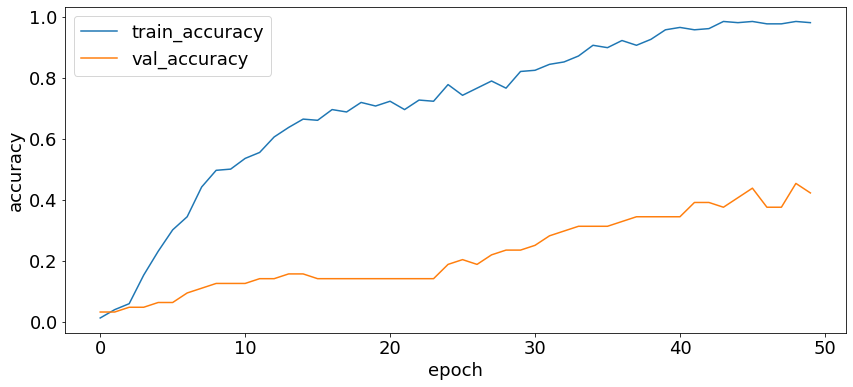

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [36]:
from sklearn.metrics import accuracy_score

x_validation_list=[]
y_validation_list=[]

val_file_path = "../feature/feature_mfcc_validation/"
val_class_names = os.listdir(val_file_path)
val_class_names.sort()
val_fname=[]
X_TF_pred = []
y_TF_pred = []

for i in range(0,len(val_class_names)):
    val_files=os.listdir(val_file_path+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]
    for j in range(0, len(val_files)):
        val_fname.append(val_file_path+val_class_names[i]+"/"+val_files[j])
        

for i,fname in zip(range(0,len(val_fname)), val_fname):
    tempX = np.load(val_fname[i])
    x_validation_list.append(tempX)
    y_validation_list.append(val_class_names.index(fname.split('/')[3]))
    
X_TF_pred = np.array(x_validation_list)
y_TF_real_pred = np.array(y_validation_list)

pred_out = model2.predict(X_TF_pred)

real =[]
pred_out_idex=[]

for i,pred in zip(range(0, len(pred_out)), pred_out) :
   
    print("Predict :",class_names[np.argmax(pred)], ", Real :", val_class_names[y_TF_real_pred[i]])
    real.append(class_names.index(val_class_names[y_TF_real_pred[i]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print (accuracy_score(real, pred_out_idex))


Predict : 2017019740016_kangyeseo , Real : 2017019740001_kwakjuheon
Predict : 2017019880004_myeongjaewon , Real : 2017019740001_kwakjuheon
Predict : 2017019770002_kwoneunkyung , Real : 2017019740001_kwakjuheon
Predict : 2017019880004_myeongjaewon , Real : 2017019740001_kwakjuheon
Predict : 2017019770024_chuminha , Real : 2017019740001_kwakjuheon
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019740012_chaeminjoon , Real : 2017019880001_kimsubin
Predict : 2017019740013_kwakyiheon , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019770005_hyeonsanghyeok , Real : 2017019880001_